In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import pandas as pd

from utils import *

Warning 3: Cannot find gdalvrt.xsd (GDAL_DATA is not defined)


In [2]:
df1 = pd.read_csv('cv_data_permanent_unbiased.csv', index_col = [0])
df1['percentage_removed'] = 10
df2 = pd.read_csv('cv_data_permanent_unbiased_.00.csv', index_col = [0])
df2['percentage_removed'] = 0
df3 = pd.read_csv('cv_data_permanent_unbiased_.20.csv', index_col = [0])
df3['percentage_removed'] = 20
df4 = pd.read_csv('cv_data_permanent_unbiased_.05.csv', index_col = [0])
df4['percentage_removed'] = 5
df5 = pd.read_csv('cv_data_permanent_unbiased_.15.csv', index_col = [0])
df5['percentage_removed'] = 15
df = pd.concat([df1, df2], ignore_index = True)
df = pd.concat([df, df3], ignore_index = True)
df = pd.concat([df, df4], ignore_index = True)
df = pd.concat([df, df5], ignore_index = True) 

df

,seed,regression,xgboost,cnn,percentage_removed
0,1,"[[1.3748230014387766, 1.3425162914374196, 1.50...","[[1.2488002804957943, 1.1912351645780894, 1.42...","[[1.3141670279826625, 1.2743870206862302, 1.45...",10
1,2,"[[1.2788261296447323, 1.46072068321, 1.1954432...","[[1.2214186457421037, 1.371299836983985, 1.113...","[[1.2790860872260326, 1.5132099115067645, 1.16...",10
2,3,"[[1.4018475006794315, 1.413911849593849, 1.417...","[[1.3577685309094534, 1.4579241596227535, 1.36...","[[1.4385733668422542, 1.5629090438357487, 1.43...",10
3,4,"[[1.2662558384629963, 1.3859933306290055, 1.35...","[[1.1501386435563998, 1.2452894409134494, 1.21...","[[1.4684900109741434, 2.033096146365221, 1.239...",10
4,5,"[[1.2897331423534288, 1.3228235051925141, 1.16...","[[1.2375117055511202, 1.2536229060706794, 1.17...","[[1.3426092087255517, 1.4058169665242086, 1.30...",10
...,...,...,...,...,...
245,46,"[[1.20153092351876, 1.1007200816397953, 1.3470...","[[1.144817107594185, 1.0886804327258026, 1.256...","[[1.4041508658243262, 1.4048168452149135, 1.39...",15
246,47,"[[1.1225811860728323, 1.2593718262085996, 0.96...","[[1.0983044073656334, 1.2398995052654265, 0.91...","[[1.23935773895817, 1.4430787910048883, 1.0566...",15
247,48,"[[1.2027347588252815, 1.2203547706150852, 1.22...","[[1.157710609839524, 1.1602125827363219, 1.220...","[[1.2315540589620961, 1.2533497648418213, 1.35...",15
248,49,"[[1.2889345025035646, 1.2589295981247066, 1.36...","[[1.2340346349654359, 1.232749065650226, 1.351...","[[1.308042719940381, 1.3325189972772025, 1.395...",15


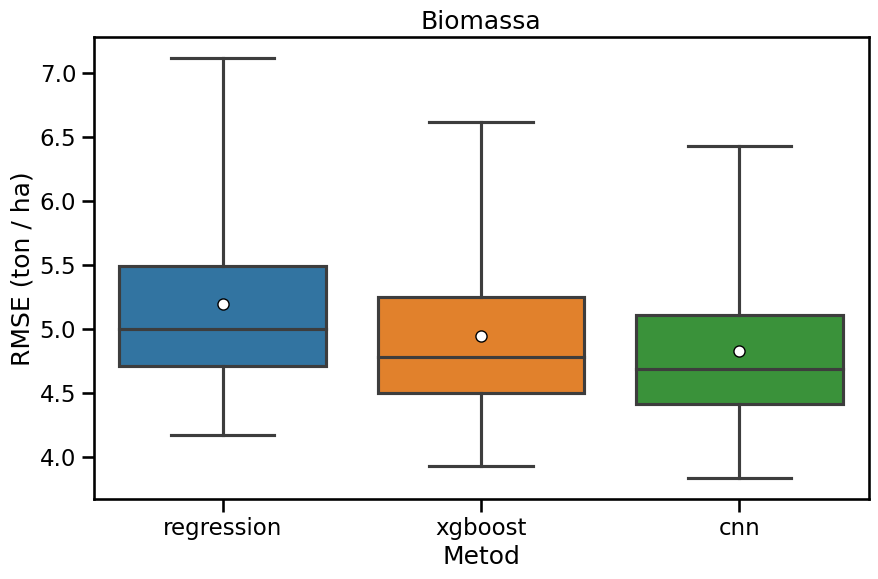

In [3]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns
df = df
# Function to convert string to actual list safely
def safe_eval_list(value):
    try:
        return ast.literal_eval(value)  # Safely evaluate the string to a Python object
    except (ValueError, SyntaxError):
        return None  # Return None if conversion fails

# General function to extract elements on the fly
def extract_elements(df, column_name, list_index, element_index):
    # Extract elements without saving as a new column
    return df[column_name].apply(lambda x: safe_eval_list(x)) \
                          .apply(lambda x: x[list_index][element_index] if x and len(x) > list_index and len(x[list_index]) > element_index else None)

# Function to plot multiple boxplots
def plot_multiple_boxplots(df, column_names, list_index, element_index):
    extracted_data = {}
    
    # Extract the relevant data for each column
    for column in column_names:
        extracted_data[column] = extract_elements(df, column, list_index, element_index)
    
    # Create a dataframe for plotting
    plot_data = pd.DataFrame(extracted_data)
    sns.set_context("talk")
    # Plot boxplots
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=plot_data, showmeans=True, whis = 10, meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black','markersize':'8'})
    plt.title(f'Biomassa')
    plt.ylabel(r"RMSE (ton / ha)")
    plt.xlabel('Metod')


# Example usage:
column_names = ['regression', 'xgboost', 'cnn']  # Columns to plot
list_index = 2  # Index of the list in the nested lists
element_index = 0  # Index of the element in the selected list

# Extract and plot three boxplots side by side
plot_multiple_boxplots(df, column_names, list_index, element_index)
#plt.savefig('biomassa.png', bbox_inches = 'tight', pad_inches = 0.1)

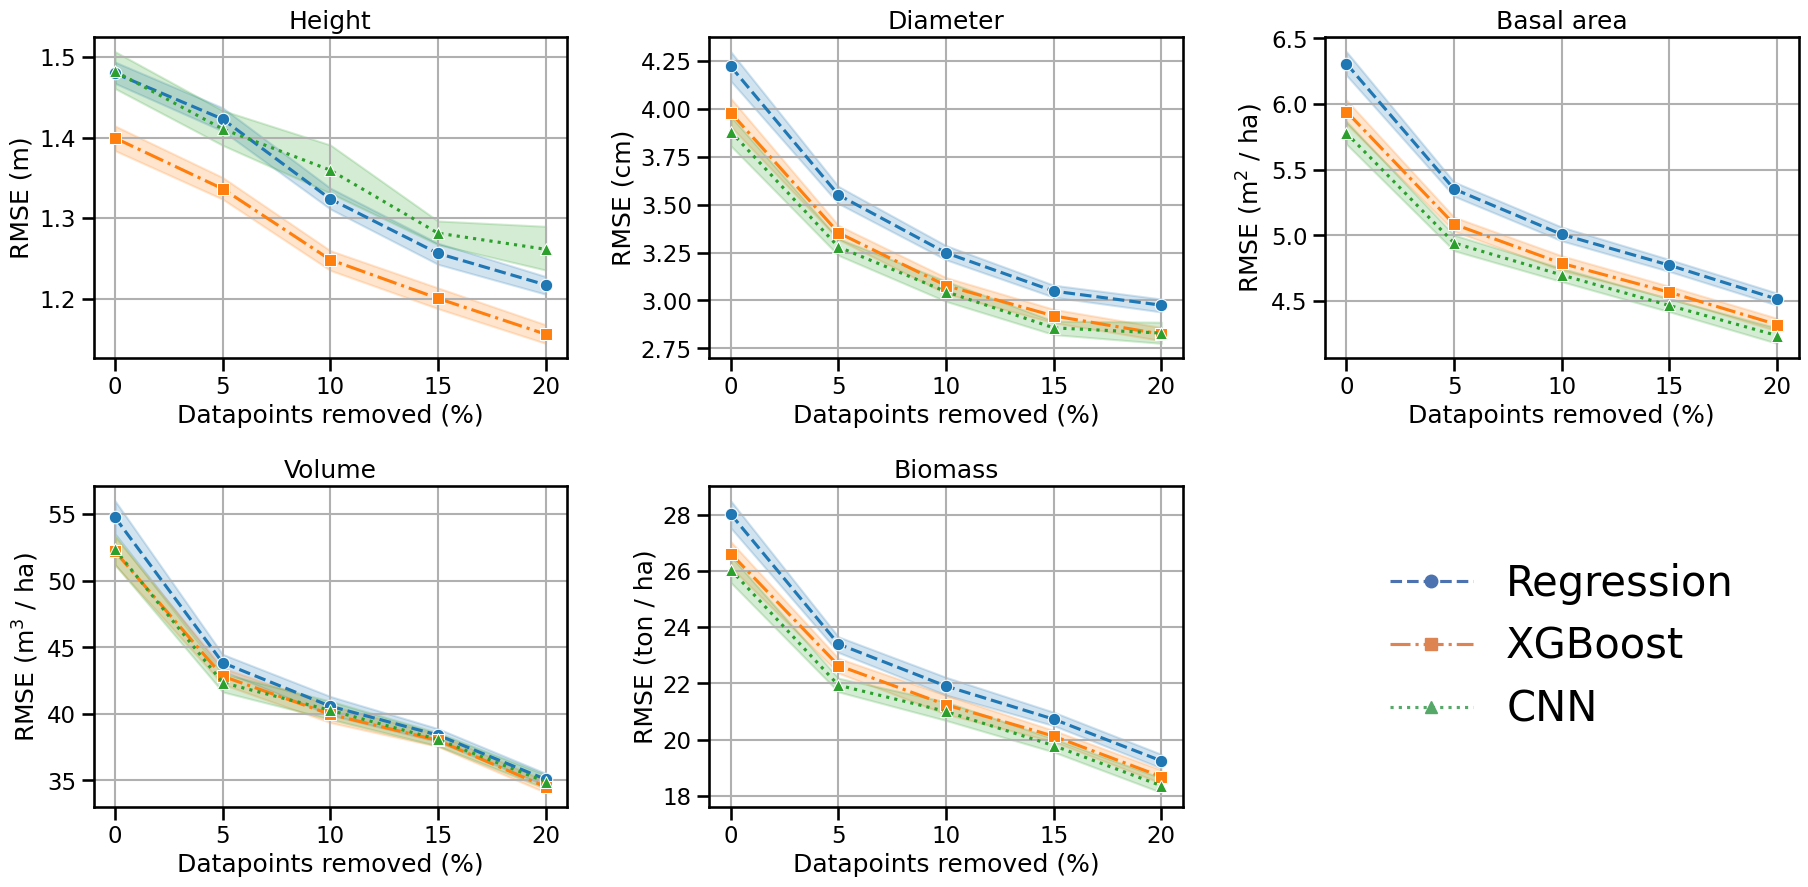

In [4]:
plt.figure(figsize = (22,10))

# Define Seaborn colors
colors = sns.color_palette("deep", n_colors=3)
regression_color = colors[0]  # First color
xgboost_color = colors[1]     # Second color
cnn_color = colors[2] 

list_index = 0
element_index = 0
df['cnn_rmse'] = extract_elements(df, 'cnn', list_index, element_index)
df['xgboost_rmse'] = extract_elements(df, 'xgboost', list_index, element_index)
df['regression_rmse'] = extract_elements(df, 'regression', list_index, element_index)
plt.subplot(2,3,1)
sns.lineplot(data=df, x='percentage_removed', y='regression_rmse', marker='o', linestyle='--')
sns.lineplot(data=df, x='percentage_removed', y='xgboost_rmse', marker='s', linestyle='-.')
sns.lineplot(data=df, x='percentage_removed', y='cnn_rmse', marker='^', linestyle=':')
plt.ylabel(r"RMSE (m)")
plt.xlabel("Datapoints removed (%)")
plt.title('Height')
plt.grid(True)

list_index = 1
element_index = 0
df['cnn_rmse'] = extract_elements(df, 'cnn', list_index, element_index)
df['xgboost_rmse'] = extract_elements(df, 'xgboost', list_index, element_index)
df['regression_rmse'] = extract_elements(df, 'regression', list_index, element_index)
plt.subplot(2,3,2)
sns.lineplot(data=df, x='percentage_removed', y='regression_rmse', marker='o', linestyle='--')
sns.lineplot(data=df, x='percentage_removed', y='xgboost_rmse', marker='s', linestyle='-.')
sns.lineplot(data=df, x='percentage_removed', y='cnn_rmse', marker='^', linestyle=':')
plt.ylabel(r"RMSE (cm)")
plt.xlabel("Datapoints removed (%)")
plt.title('Diameter')
plt.grid(True)

list_index = 2
element_index = 0
df['cnn_rmse'] = extract_elements(df, 'cnn', list_index, element_index)
df['xgboost_rmse'] = extract_elements(df, 'xgboost', list_index, element_index)
df['regression_rmse'] = extract_elements(df, 'regression', list_index, element_index)
plt.subplot(2,3,3)
sns.lineplot(data=df, x='percentage_removed', y='regression_rmse', marker='o', linestyle='--')
sns.lineplot(data=df, x='percentage_removed', y='xgboost_rmse', marker='s', linestyle='-.')
sns.lineplot(data=df, x='percentage_removed', y='cnn_rmse', marker='^', linestyle=':')
plt.ylabel(r"RMSE (m$^2$ / ha)")
plt.xlabel("Datapoints removed (%)")
plt.title('Basal area')
plt.grid(True)

list_index = 3
element_index = 0
df['cnn_rmse'] = extract_elements(df, 'cnn', list_index, element_index)
df['xgboost_rmse'] = extract_elements(df, 'xgboost', list_index, element_index)
df['regression_rmse'] = extract_elements(df, 'regression', list_index, element_index)
plt.subplot(2,3,4)
sns.lineplot(data=df, x='percentage_removed', y='regression_rmse', marker='o', linestyle='--')
sns.lineplot(data=df, x='percentage_removed', y='xgboost_rmse', marker='s', linestyle='-.')
sns.lineplot(data=df, x='percentage_removed', y='cnn_rmse', marker='^', linestyle=':')
plt.ylabel(r"RMSE (m$^3$ / ha)")
plt.xlabel("Datapoints removed (%)")
plt.title('Volume')
plt.grid(True)

list_index = 4
element_index = 0
df['cnn_rmse'] = extract_elements(df, 'cnn', list_index, element_index)
df['xgboost_rmse'] = extract_elements(df, 'xgboost', list_index, element_index)
df['regression_rmse'] = extract_elements(df, 'regression', list_index, element_index)
plt.subplot(2,3,5)
sns.lineplot(data=df, x='percentage_removed', y='regression_rmse', marker='o', linestyle='--')
sns.lineplot(data=df, x='percentage_removed', y='xgboost_rmse', marker='s', linestyle='-.')
sns.lineplot(data=df, x='percentage_removed', y='cnn_rmse', marker='^', linestyle=':')
plt.ylabel(r"RMSE (ton / ha)")
plt.xlabel("Datapoints removed (%)")
plt.title('Biomass')
plt.grid(True)

plt.subplot(2,3,6)
plt.axis('off')
legend_elements = [
    plt.Line2D([0], [0], color=regression_color, linestyle='--', marker='o', label='Regression'),
    plt.Line2D([0], [0], color=xgboost_color, linestyle='-.', marker='s', label='XGBoost'),
    plt.Line2D([0], [0], color=cnn_color, linestyle=':', marker='^', label='CNN')
]

# Add explanation using plt.legend
plt.legend(handles=legend_elements, loc='center', fontsize=30, frameon=False)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.savefig('percentages_removed.png', bbox_inches = 'tight', pad_inches = 0.1, dpi = 300)
plt.show()

In [ ]:
plot_multiple_boxplots(df, column_names, list_index, element_index)
plot_multiple_boxplots(df, column_names, list_index, element_index)
plot_multiple_boxplots(df, column_names, list_index, element_index)

In [34]:
#get results in terms of means and stds
df = df1
list_index = 0  # Index of the list in the nested lists
element_index = 0  # Index of the element in the selected list

print(np.round(np.mean(extract_elements(df, 'regression', list_index, element_index)), decimals = 2),
     '&', 
     np.round(np.std(extract_elements(df, 'regression', list_index, element_index)), decimals = 2),
      '&',
     np.round(np.mean(extract_elements(df, 'xgboost', list_index, element_index)), decimals = 2),
      '&',
     np.round(np.std(extract_elements(df, 'xgboost', list_index, element_index)), decimals = 2),
      '&',
     np.round(np.mean(extract_elements(df, 'cnn', list_index, element_index)), decimals = 2),
      '&',
     np.round(np.std(extract_elements(df, 'cnn', list_index, element_index)), decimals = 2),

      '&',
      np.round(np.mean(extract_elements(df, 'xgboost_coords', list_index, element_index)), decimals = 2),
      '&',
      np.round(np.std(extract_elements(df, 'xgboost_coords', list_index, element_index)), decimals = 2),
      '&',
      np.round(np.mean(extract_elements(df, 'cnn_coords', list_index, element_index)), decimals = 2),
      '&',
      np.round(np.std(extract_elements(df, 'cnn_coords', list_index, element_index)), decimals = 2),

     )



21.9 & 1.2 & 21.24 & 1.22 & 21.0 & 1.18 & 21.11 & 1.22 & 20.94 & 1.2


### obtain min-max and means over field data

In [16]:
data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
#get region data
data_1 = data.loc[data['area_code'] == 1]
data_2 = data.loc[data['area_code'] == 2]
data_3 = data.loc[data['area_code'] == 3]
data_4 = data.loc[data['area_code'] == 4]
datas = data_4
print(np.round(np.mean(datas['Hgv']), 0).astype(int), 
      '&',
    np.round(np.min(datas['Hgv']), 0).astype(int),
    '&',
    np.round(np.max(datas['Hgv']), 0).astype(int),


'&', np.round(np.mean(datas['Dgv']), 0).astype(int),
'&',np.round(np.min(datas['Dgv']), 0).astype(int), 
'&',np.round(np.max(datas['Dgv']), 0).astype(int),

'&',np.round(np.mean(datas['Basal_area']), 0).astype(int),
'&',np.round(np.min(datas['Basal_area']), 0).astype(int),
'&',np.round(np.max(datas['Basal_area']), 0).astype(int),

'&',np.round(np.mean(datas['Volume']), 0).astype(int),
'&',np.round(np.min(datas['Volume']), 0).astype(int),
'&',np.round(np.max(datas['Volume']), 0).astype(int),

'&',np.round(np.mean(datas['Biomassa_above']), 0).astype(int),
'&',np.round(np.min(datas['Biomassa_above']), 0).astype(int),
'&',np.round(np.max(datas['Biomassa_above']), 0).astype(int))

print(len(datas))

12 & 0 & 25 & 16 & 0 & 37 & 17 & 0 & 53 & 115 & 0 & 611 & 65 & 0 & 295
1726


/tmp/ipykernel_241562/3181312603.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')


### obtain region-wise rmse over some variables

In [8]:
df = df1
list_index = 1 #variable to choose
variables = ['Hgv', 'Dgv', 'Basal_area', 'Volume', 'Biomassa_above']
all_sweden = extract_elements(df, 'cnn', list_index, 0)
gotaland = extract_elements(df, 'cnn', list_index, 1)
svealand = extract_elements(df, 'cnn', list_index, 2)
s_norrland = extract_elements(df, 'cnn', list_index, 3)
n_norrland = extract_elements(df, 'cnn', list_index, 4)

box_data = pd.DataFrame({'Götaland': gotaland, 'Svealand': svealand, 'S. Norrland': s_norrland, 'N. Norrland': n_norrland})

list_index = 3 #variable to choose
all_sweden = extract_elements(df, 'cnn', list_index, 0)
gotaland = extract_elements(df, 'cnn', list_index, 1)
svealand = extract_elements(df, 'cnn', list_index, 2)
s_norrland = extract_elements(df, 'cnn', list_index, 3)
n_norrland = extract_elements(df, 'cnn', list_index, 4)

box_data_2 = pd.DataFrame({'Götaland': gotaland, 'Svealand': svealand, 'S. Norrland': s_norrland, 'N. Norrland': n_norrland})

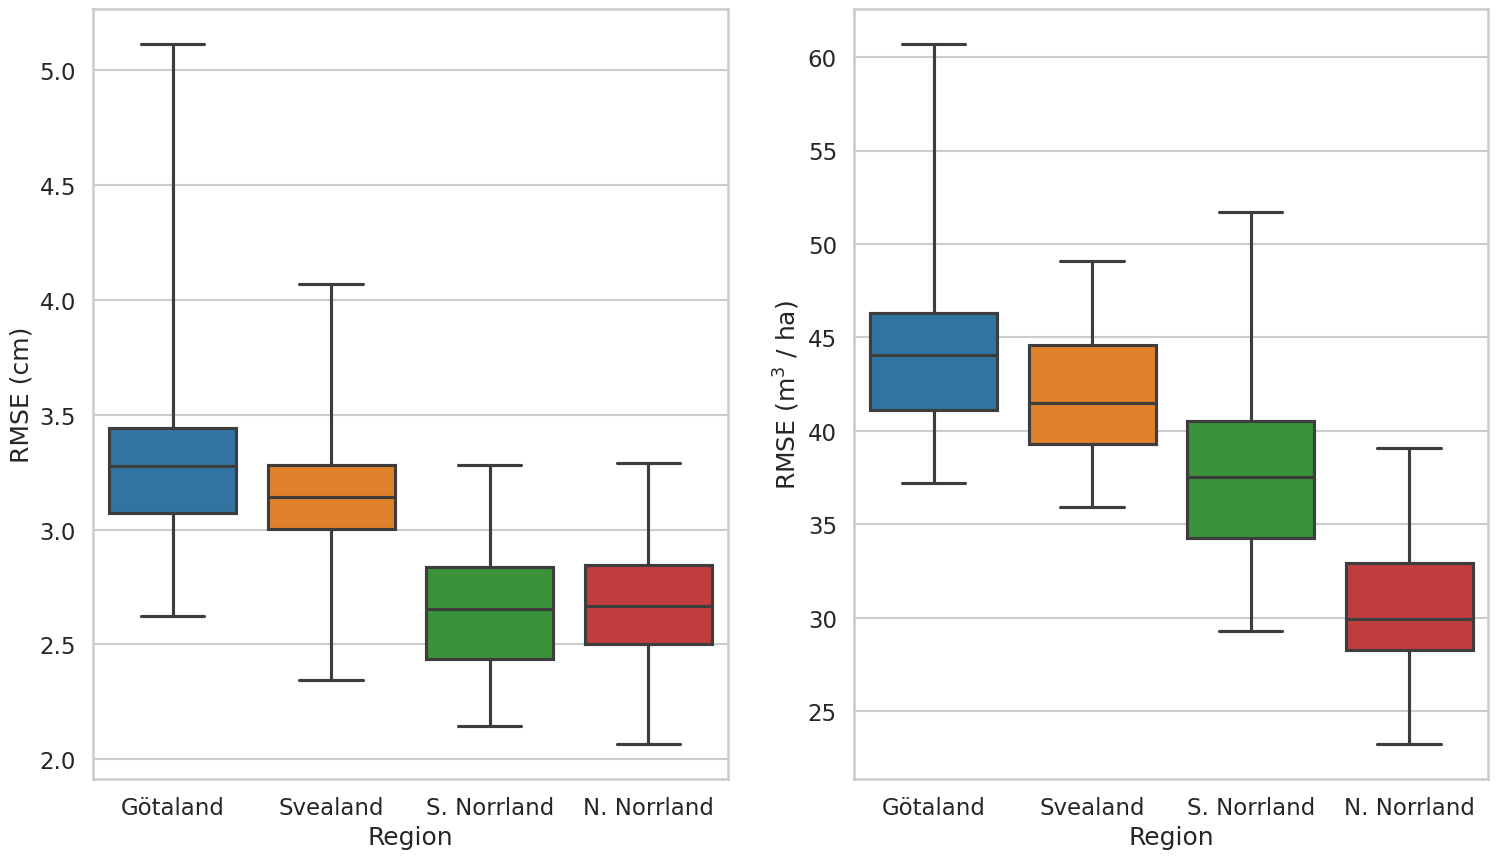

In [9]:
fig, axes = plt.subplots(1,2, figsize=(18, 10))
sns.set_style("whitegrid")
ax = sns.boxplot(ax=axes[0], data = box_data, whis = 10)
ax.set(xlabel='Region', ylabel='RMSE (cm)')
ax = sns.boxplot(ax=axes[1], data = box_data_2, whis = 10)
ax.set(xlabel='Region', ylabel=r"RMSE (m$^3$ / ha)")
plt.savefig('rmse_regions.png', bbox_inches = 'tight', pad_inches = 0.1, dpi = 300)

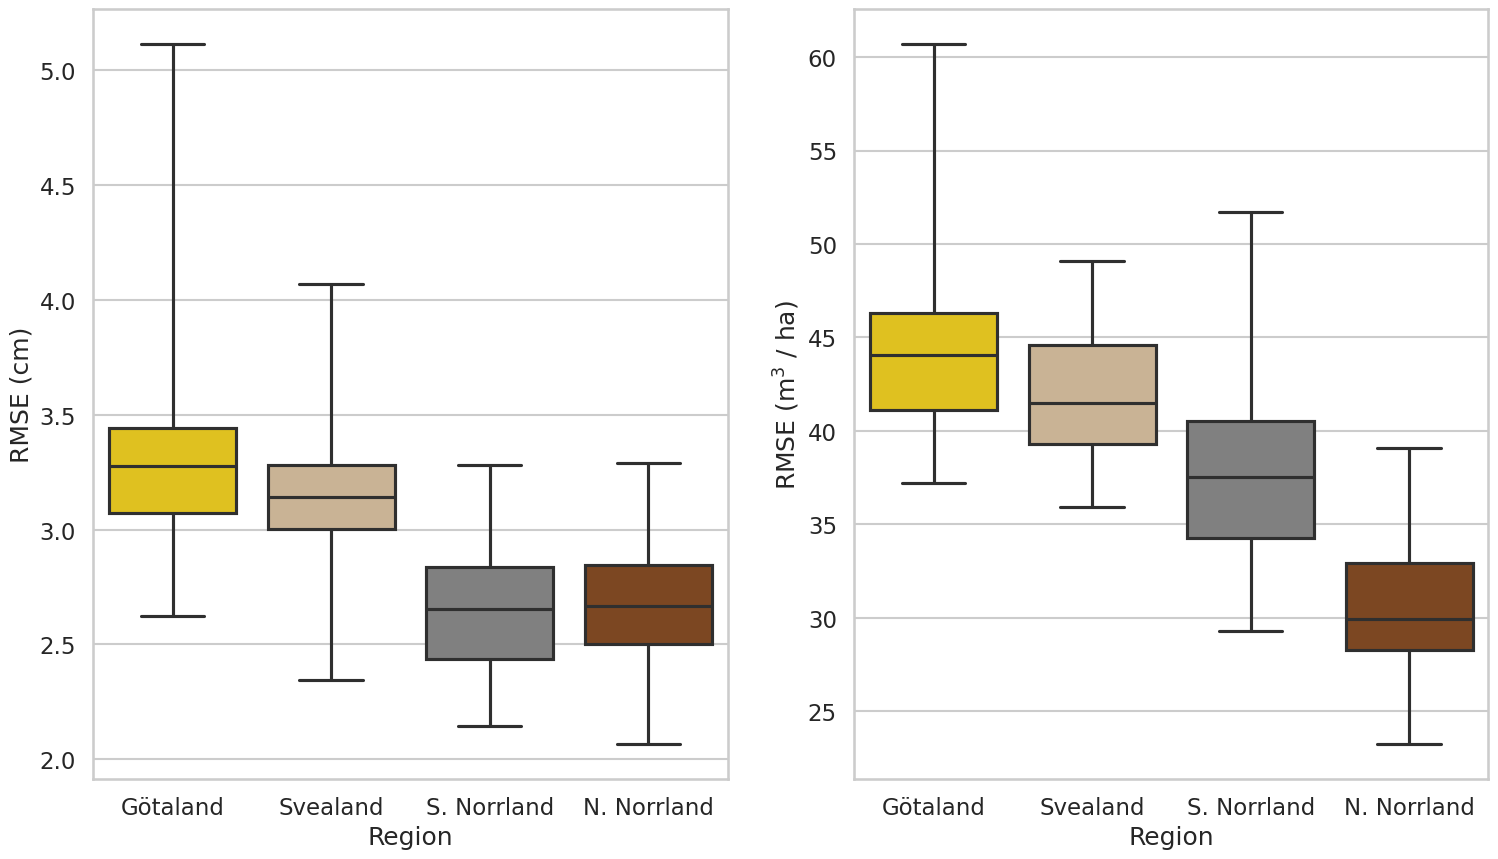

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom palette
custom_palette = ["#FFD700", "#D2B48C", "#808080", "#8B4513"]  # Yellow, beige, grey, brown

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.set_style("whitegrid")

# Boxplot for the first dataset
ax = sns.boxplot(ax=axes[0], data=box_data, whis=10, palette=custom_palette)
ax.set(xlabel='Region', ylabel='RMSE (cm)')

# Boxplot for the second dataset
ax = sns.boxplot(ax=axes[1], data=box_data_2, whis=10, palette=custom_palette)
ax.set(xlabel='Region', ylabel=r"RMSE (m$^3$ / ha)")

# Save the figure
plt.savefig('rmse_regions.png', bbox_inches='tight', pad_inches=0.1, dpi=300)

### Obtain percentage rmses over regions

In [5]:
df = df1
percentage_data = pd.DataFrame(columns = ['Attribute', 'Region', 'Average relative RMSE (%)'])
percentage_rmses_1 = []
percentage_rmses_2 = []
percentage_rmses_3 = []
percentage_rmses_4 = []
df = df1
for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_test_1_mean = np.mean(filter_test_data_based_on_region(data, 1)['Hgv'])
    data_rmse_1 = extract_elements(df, 'cnn', 0, 1)[index]
    data_test_2_mean = np.mean(filter_test_data_based_on_region(data, 2)['Hgv'])
    data_rmse_2 = extract_elements(df, 'cnn', 0, 2)[index]
    data_test_3_mean = np.mean(filter_test_data_based_on_region(data, 3)['Hgv'])
    data_rmse_3 = extract_elements(df, 'cnn', 0, 3)[index]
    data_test_4_mean = np.mean(filter_test_data_based_on_region(data, 4)['Hgv'])
    data_rmse_4 = extract_elements(df, 'cnn', 0, 4)[index]
    percentage_rmses_1.append(data_rmse_1 / data_test_1_mean)
    percentage_rmses_2.append(data_rmse_2 / data_test_2_mean)
    percentage_rmses_3.append(data_rmse_3 / data_test_3_mean)
    percentage_rmses_4.append(data_rmse_4 / data_test_4_mean)

    
percentage_rmse_1 = np.mean(percentage_rmses_1) *100
percentage_rmse_2 = np.mean(percentage_rmses_2) *100
percentage_rmse_3 = np.mean(percentage_rmses_3) *100
percentage_rmse_4 = np.mean(percentage_rmses_4) *100

new_row = pd.DataFrame({'Attribute': 'Height', 'Region': 'Götaland', 'Average relative RMSE (%)': percentage_rmse_1}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Height', 'Region': 'Svealand', 'Average relative RMSE (%)': percentage_rmse_2}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Height', 'Region': 'S. Norrland', 'Average relative RMSE (%)': percentage_rmse_3}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Height', 'Region': 'N. Norrland', 'Average relative RMSE (%)': percentage_rmse_4}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)

percentage_rmses_1 = []
percentage_rmses_2 = []
percentage_rmses_3 = []
percentage_rmses_4 = []
for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_test_1_mean = np.mean(filter_test_data_based_on_region(data, 1)['Dgv'])
    data_rmse_1 = extract_elements(df, 'cnn', 1, 1)[index]
    data_test_2_mean = np.mean(filter_test_data_based_on_region(data, 2)['Dgv'])
    data_rmse_2 = extract_elements(df, 'cnn', 1, 2)[index]
    data_test_3_mean = np.mean(filter_test_data_based_on_region(data, 3)['Dgv'])
    data_rmse_3 = extract_elements(df, 'cnn', 1, 3)[index]
    data_test_4_mean = np.mean(filter_test_data_based_on_region(data, 4)['Dgv'])
    data_rmse_4 = extract_elements(df, 'cnn', 1, 4)[index]
    percentage_rmses_1.append(data_rmse_1 / data_test_1_mean)
    percentage_rmses_2.append(data_rmse_2 / data_test_2_mean)
    percentage_rmses_3.append(data_rmse_3 / data_test_3_mean)
    percentage_rmses_4.append(data_rmse_4 / data_test_4_mean)

    
percentage_rmse_1 = np.mean(percentage_rmses_1) *100
percentage_rmse_2 = np.mean(percentage_rmses_2) *100
percentage_rmse_3 = np.mean(percentage_rmses_3) *100
percentage_rmse_4 = np.mean(percentage_rmses_4) *100

new_row = pd.DataFrame({'Attribute': 'Diameter', 'Region': 'Götaland', 'Average relative RMSE (%)': percentage_rmse_1}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Diameter', 'Region': 'Svealand', 'Average relative RMSE (%)': percentage_rmse_2}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Diameter', 'Region': 'S. Norrland', 'Average relative RMSE (%)': percentage_rmse_3}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Diameter', 'Region': 'N. Norrland', 'Average relative RMSE (%)': percentage_rmse_4}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)

percentage_rmses_1 = []
percentage_rmses_2 = []
percentage_rmses_3 = []
percentage_rmses_4 = []
for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_test_1_mean = np.mean(filter_test_data_based_on_region(data, 1)['Basal_area'])
    data_rmse_1 = extract_elements(df, 'cnn', 2, 1)[index]
    data_test_2_mean = np.mean(filter_test_data_based_on_region(data, 2)['Basal_area'])
    data_rmse_2 = extract_elements(df, 'cnn', 2, 2)[index]
    data_test_3_mean = np.mean(filter_test_data_based_on_region(data, 3)['Basal_area'])
    data_rmse_3 = extract_elements(df, 'cnn', 2, 3)[index]
    data_test_4_mean = np.mean(filter_test_data_based_on_region(data, 4)['Basal_area'])
    data_rmse_4 = extract_elements(df, 'cnn', 2, 4)[index]
    percentage_rmses_1.append(data_rmse_1 / data_test_1_mean)
    percentage_rmses_2.append(data_rmse_2 / data_test_2_mean)
    percentage_rmses_3.append(data_rmse_3 / data_test_3_mean)
    percentage_rmses_4.append(data_rmse_4 / data_test_4_mean)

    
percentage_rmse_1 = np.mean(percentage_rmses_1) *100
percentage_rmse_2 = np.mean(percentage_rmses_2) *100
percentage_rmse_3 = np.mean(percentage_rmses_3) *100
percentage_rmse_4 = np.mean(percentage_rmses_4) *100

new_row = pd.DataFrame({'Attribute': 'Basal area', 'Region': 'Götaland', 'Average relative RMSE (%)': percentage_rmse_1}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Basal area', 'Region': 'Svealand', 'Average relative RMSE (%)': percentage_rmse_2}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Basal area', 'Region': 'S. Norrland', 'Average relative RMSE (%)': percentage_rmse_3}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Basal area', 'Region': 'N. Norrland', 'Average relative RMSE (%)': percentage_rmse_4}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)

percentage_rmses_1 = []
percentage_rmses_2 = []
percentage_rmses_3 = []
percentage_rmses_4 = []
for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_test_1_mean = np.mean(filter_test_data_based_on_region(data, 1)['Volume'])
    data_rmse_1 = extract_elements(df, 'cnn', 3, 1)[index]
    data_test_2_mean = np.mean(filter_test_data_based_on_region(data, 2)['Volume'])
    data_rmse_2 = extract_elements(df, 'cnn', 3, 2)[index]
    data_test_3_mean = np.mean(filter_test_data_based_on_region(data, 3)['Volume'])
    data_rmse_3 = extract_elements(df, 'cnn', 3, 3)[index]
    data_test_4_mean = np.mean(filter_test_data_based_on_region(data, 4)['Volume'])
    data_rmse_4 = extract_elements(df, 'cnn', 3, 4)[index]
    percentage_rmses_1.append(data_rmse_1 / data_test_1_mean)
    percentage_rmses_2.append(data_rmse_2 / data_test_2_mean)
    percentage_rmses_3.append(data_rmse_3 / data_test_3_mean)
    percentage_rmses_4.append(data_rmse_4 / data_test_4_mean)

    
percentage_rmse_1 = np.mean(percentage_rmses_1) *100
percentage_rmse_2 = np.mean(percentage_rmses_2) *100
percentage_rmse_3 = np.mean(percentage_rmses_3) *100
percentage_rmse_4 = np.mean(percentage_rmses_4) *100

new_row = pd.DataFrame({'Attribute': 'Volume', 'Region': 'Götaland', 'Average relative RMSE (%)': percentage_rmse_1}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Volume', 'Region': 'Svealand', 'Average relative RMSE (%)': percentage_rmse_2}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Volume', 'Region': 'S. Norrland', 'Average relative RMSE (%)': percentage_rmse_3}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Volume', 'Region': 'N. Norrland', 'Average relative RMSE (%)': percentage_rmse_4}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)

percentage_rmses_1 = []
percentage_rmses_2 = []
percentage_rmses_3 = []
percentage_rmses_4 = []
for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_test_1_mean = np.mean(filter_test_data_based_on_region(data, 1)['Biomassa_above'])
    data_rmse_1 = extract_elements(df, 'cnn', 4, 1)[index]
    data_test_2_mean = np.mean(filter_test_data_based_on_region(data, 2)['Biomassa_above'])
    data_rmse_2 = extract_elements(df, 'cnn', 4, 2)[index]
    data_test_3_mean = np.mean(filter_test_data_based_on_region(data, 3)['Biomassa_above'])
    data_rmse_3 = extract_elements(df, 'cnn', 4, 3)[index]
    data_test_4_mean = np.mean(filter_test_data_based_on_region(data, 4)['Biomassa_above'])
    data_rmse_4 = extract_elements(df, 'cnn', 4, 4)[index]
    percentage_rmses_1.append(data_rmse_1 / data_test_1_mean)
    percentage_rmses_2.append(data_rmse_2 / data_test_2_mean)
    percentage_rmses_3.append(data_rmse_3 / data_test_3_mean)
    percentage_rmses_4.append(data_rmse_4 / data_test_4_mean)

    
percentage_rmse_1 = np.mean(percentage_rmses_1) *100
percentage_rmse_2 = np.mean(percentage_rmses_2) *100
percentage_rmse_3 = np.mean(percentage_rmses_3) *100
percentage_rmse_4 = np.mean(percentage_rmses_4) *100

new_row = pd.DataFrame({'Attribute': 'Biomass', 'Region': 'Götaland', 'Average relative RMSE (%)': percentage_rmse_1}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Biomass', 'Region': 'Svealand', 'Average relative RMSE (%)': percentage_rmse_2}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Biomass', 'Region': 'S. Norrland', 'Average relative RMSE (%)': percentage_rmse_3}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Biomass', 'Region': 'N. Norrland', 'Average relative RMSE (%)': percentage_rmse_4}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)



/tmp/ipykernel_3162443/2842083714.py:9: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
/tmp/ipykernel_3162443/2842083714.py:9: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
/tmp/ipykernel_3162443/2842083714.py:9: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
/tmp/ipykernel_3162443/2842083714.py:9: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
/tmp/ipykernel_3162443/2842083714.py:9: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or 

In [15]:
np.std(np.array(percentage_rmses_4)*100)

2.598184969615724

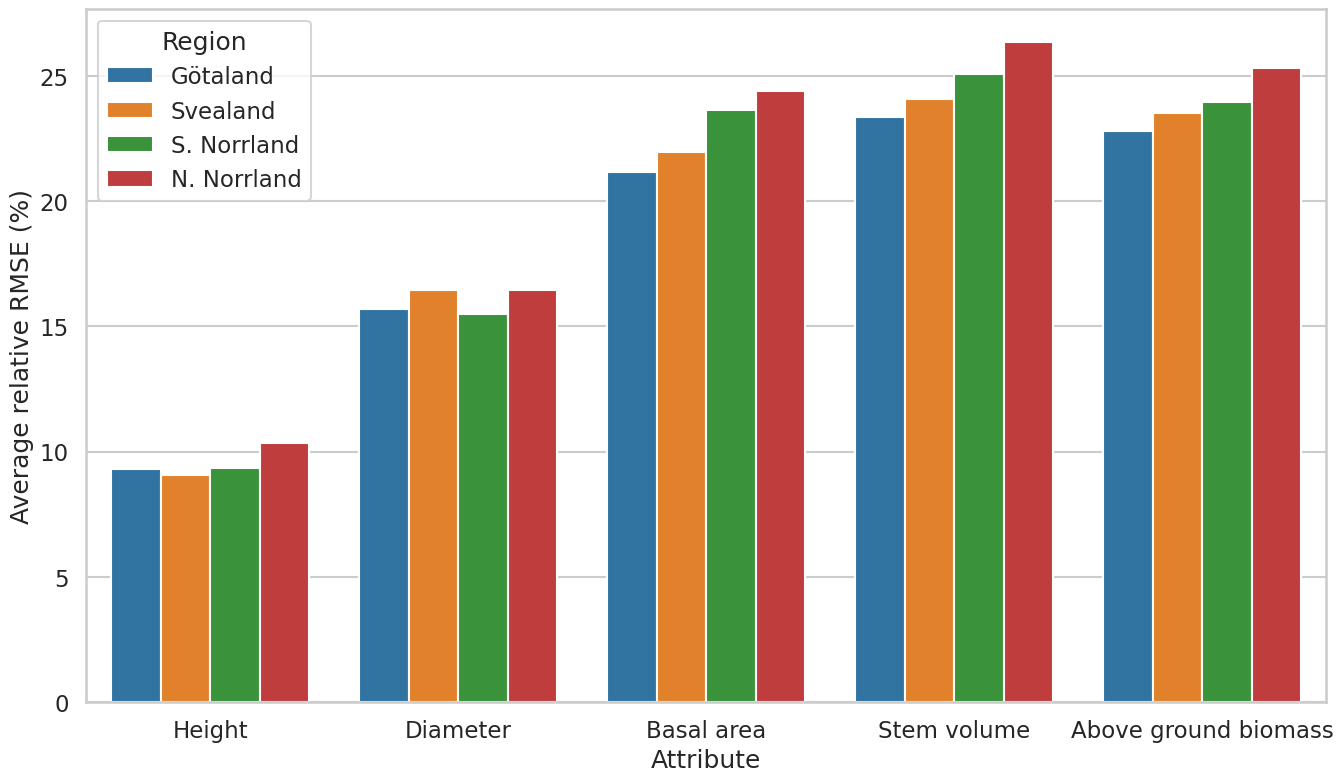

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 9))
sns.barplot(
    data=percentage_data, 
    x='Attribute', 
    y='Average relative RMSE (%)', 
    hue='Region'
)

plt.savefig('rel_rmse_region.png', bbox_inches = 'tight', pad_inches = 0.1, dpi = 300)

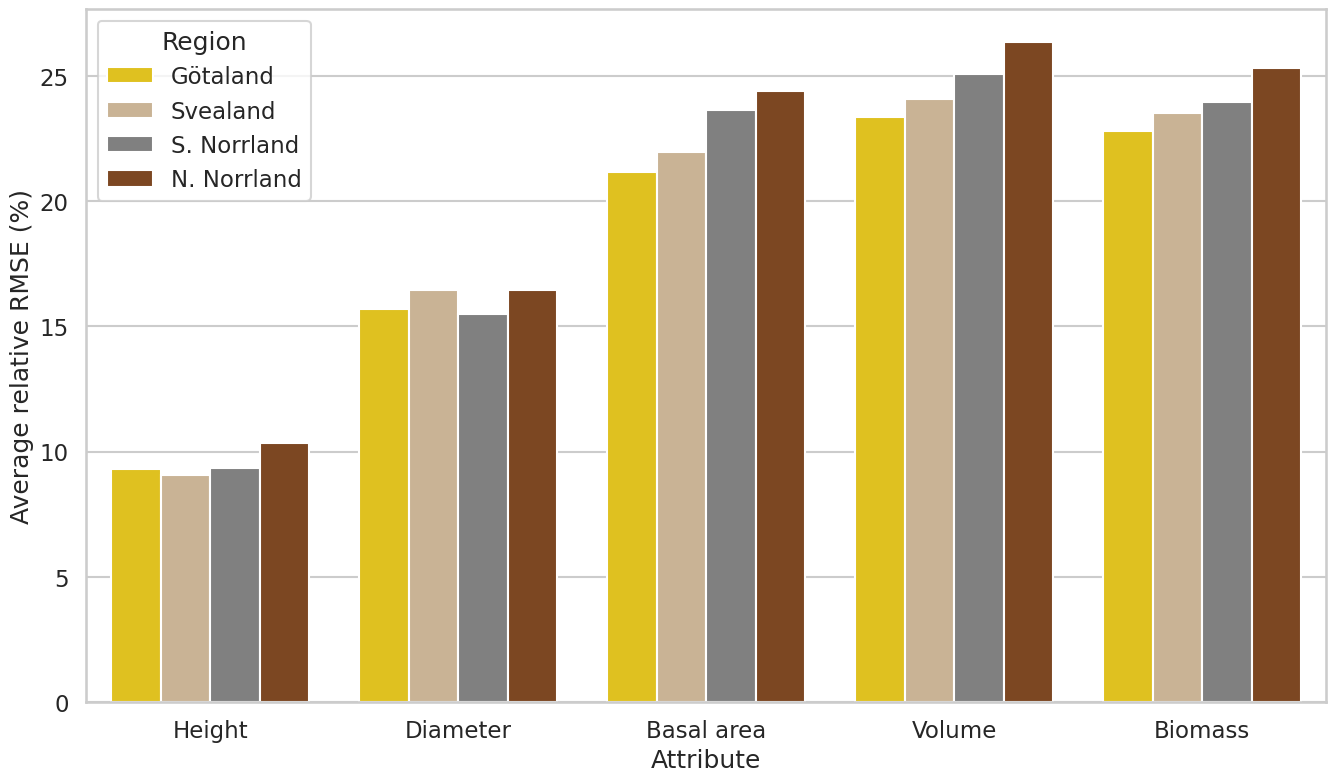

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom palette
custom_palette = ["#FFD700", "#D2B48C", "#808080", "#8B4513"]  # Yellow, beige, grey, brown

# Set the style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(16, 9))

# Create the barplot with the custom palette
sns.barplot(
    data=percentage_data, 
    x='Attribute', 
    y='Average relative RMSE (%)', 
    hue='Region', 
    palette=custom_palette
)

# Save the figure
plt.savefig('rel_rmse_region.png', bbox_inches='tight', pad_inches=0.1, dpi=300)



In [7]:
percentage_data = pd.DataFrame(columns = ['Attribute', 'Region', 'Average relative RMSE (%)'])
percentage_rmses_regression = []
percentage_rmses_xgboost = []
percentage_rmses_cnn = []
df = df1
for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_rmse_regression = extract_elements(df, 'regression', 0, 0)[index]
    data_rmse_xgboost = extract_elements(df, 'xgboost', 0, 0)[index]
    data_rmse_cnn = extract_elements(df, 'cnn', 0, 0)[index]
    data_test_mean = np.mean(data_test['Hgv'])
    percentage_rmses_regression.append(data_rmse_regression / data_test_mean)
    percentage_rmses_xgboost.append(data_rmse_xgboost / data_test_mean)
    percentage_rmses_cnn.append(data_rmse_cnn / data_test_mean)

percentage_rmse_regression = np.mean(percentage_rmses_regression) *100
percentage_rmse_xgboost = np.mean(percentage_rmses_xgboost) *100
percentage_rmse_cnn = np.mean(percentage_rmses_cnn) *100

new_row = pd.DataFrame({'Attribute': 'Height', 'Model': 'Regression', 'Average relative RMSE (%)': percentage_rmse_regression}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Height', 'Model': 'XGBoost', 'Average relative RMSE (%)': percentage_rmse_xgboost}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Height', 'Model': 'CNN', 'Average relative RMSE (%)': percentage_rmse_cnn}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)

percentage_rmses_regression = []
percentage_rmses_xgboost = []
percentage_rmses_cnn = []

for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_rmse_regression = extract_elements(df, 'regression', 1, 0)[index]
    data_rmse_xgboost = extract_elements(df, 'xgboost', 1, 0)[index]
    data_rmse_cnn = extract_elements(df, 'cnn', 1, 0)[index]
    data_test_mean = np.mean(data_test['Dgv'])
    percentage_rmses_regression.append(data_rmse_regression / data_test_mean)
    percentage_rmses_xgboost.append(data_rmse_xgboost / data_test_mean)
    percentage_rmses_cnn.append(data_rmse_cnn / data_test_mean)

percentage_rmse_regression = np.mean(percentage_rmses_regression) *100
percentage_rmse_xgboost = np.mean(percentage_rmses_xgboost) *100
percentage_rmse_cnn = np.mean(percentage_rmses_cnn) *100

new_row = pd.DataFrame({'Attribute': 'Diameter', 'Model': 'Regression', 'Average relative RMSE (%)': percentage_rmse_regression}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Diameter', 'Model': 'XGBoost', 'Average relative RMSE (%)': percentage_rmse_xgboost}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Diameter', 'Model': 'CNN', 'Average relative RMSE (%)': percentage_rmse_cnn}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)

percentage_rmses_regression = []
percentage_rmses_xgboost = []
percentage_rmses_cnn = []

for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_rmse_regression = extract_elements(df, 'regression', 2, 0)[index]
    data_rmse_xgboost = extract_elements(df, 'xgboost', 2, 0)[index]
    data_rmse_cnn = extract_elements(df, 'cnn', 2, 0)[index]
    data_test_mean = np.mean(data_test['Basal_area'])
    percentage_rmses_regression.append(data_rmse_regression / data_test_mean)
    percentage_rmses_xgboost.append(data_rmse_xgboost / data_test_mean)
    percentage_rmses_cnn.append(data_rmse_cnn / data_test_mean)

percentage_rmse_regression = np.mean(percentage_rmses_regression) *100
percentage_rmse_xgboost = np.mean(percentage_rmses_xgboost) *100
percentage_rmse_cnn = np.mean(percentage_rmses_cnn) *100

new_row = pd.DataFrame({'Attribute': 'Basal_area', 'Model': 'Regression', 'Average relative RMSE (%)': percentage_rmse_regression}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Basal_area', 'Model': 'XGBoost', 'Average relative RMSE (%)': percentage_rmse_xgboost}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Basal_area', 'Model': 'CNN', 'Average relative RMSE (%)': percentage_rmse_cnn}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)

percentage_rmses_regression = []
percentage_rmses_xgboost = []
percentage_rmses_cnn = []

for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_rmse_regression = extract_elements(df, 'regression', 3, 0)[index]
    data_rmse_xgboost = extract_elements(df, 'xgboost', 3, 0)[index]
    data_rmse_cnn = extract_elements(df, 'cnn', 3, 0)[index]
    data_test_mean = np.mean(data_test['Volume'])
    percentage_rmses_regression.append(data_rmse_regression / data_test_mean)
    percentage_rmses_xgboost.append(data_rmse_xgboost / data_test_mean)
    percentage_rmses_cnn.append(data_rmse_cnn / data_test_mean)

percentage_rmse_regression = np.mean(percentage_rmses_regression) *100
percentage_rmse_xgboost = np.mean(percentage_rmses_xgboost) *100
percentage_rmse_cnn = np.mean(percentage_rmses_cnn) *100

new_row = pd.DataFrame({'Attribute': 'Volume', 'Model': 'Regression', 'Average relative RMSE (%)': percentage_rmse_regression}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Volume', 'Model': 'XGBoost', 'Average relative RMSE (%)': percentage_rmse_xgboost}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Volume', 'Model': 'CNN', 'Average relative RMSE (%)': percentage_rmse_cnn}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)

percentage_rmses_regression = []
percentage_rmses_xgboost = []
percentage_rmses_cnn = []

for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_rmse_regression = extract_elements(df, 'regression', 4, 0)[index]
    data_rmse_xgboost = extract_elements(df, 'xgboost', 4, 0)[index]
    data_rmse_cnn = extract_elements(df, 'cnn', 4, 0)[index]
    data_test_mean = np.mean(data_test['Biomassa_above'])
    percentage_rmses_regression.append(data_rmse_regression / data_test_mean)
    percentage_rmses_xgboost.append(data_rmse_xgboost / data_test_mean)
    percentage_rmses_cnn.append(data_rmse_cnn / data_test_mean)

percentage_rmse_regression = np.mean(percentage_rmses_regression) *100
percentage_rmse_xgboost = np.mean(percentage_rmses_xgboost) *100
percentage_rmse_cnn = np.mean(percentage_rmses_cnn) *100

new_row = pd.DataFrame({'Attribute': 'Biomass', 'Model': 'Regression', 'Average relative RMSE (%)': percentage_rmse_regression}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Biomass', 'Model': 'XGBoost', 'Average relative RMSE (%)': percentage_rmse_xgboost}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)
new_row = pd.DataFrame({'Attribute': 'Biomass', 'Model': 'CNN', 'Average relative RMSE (%)': percentage_rmse_cnn}, index=[0])
percentage_data = pd.concat([percentage_data, new_row], ignore_index = True)


/tmp/ipykernel_3162443/2142829537.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
/tmp/ipykernel_3162443/2142829537.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
/tmp/ipykernel_3162443/2142829537.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
/tmp/ipykernel_3162443/2142829537.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
/tmp/ipykernel_3162443/2142829537.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or 

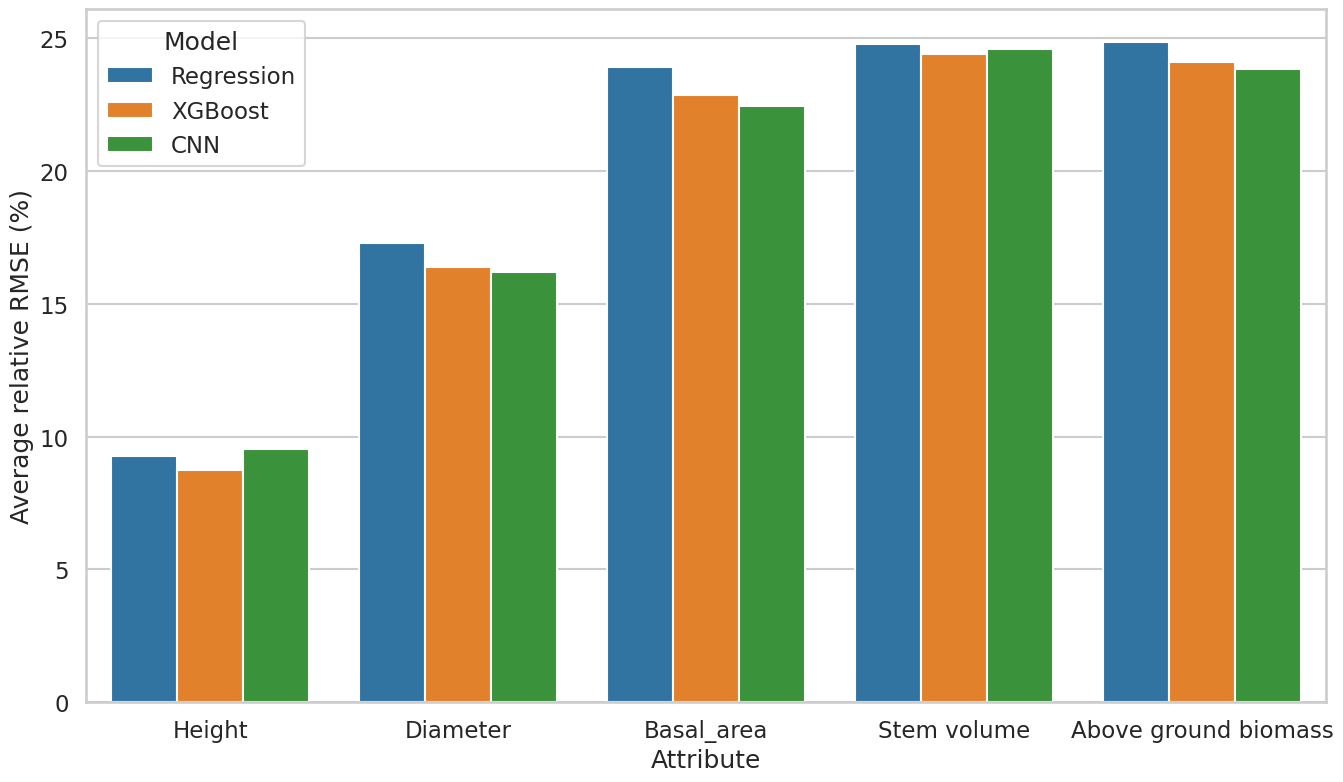

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 9))
sns.barplot(
    data=percentage_data, 
    x='Attribute', 
    y='Average relative RMSE (%)', 
    hue='Model'
)
plt.savefig('initial_results.png', bbox_inches = 'tight', pad_inches = 0.1, dpi = 300)

In [13]:
variables = ['Hgv', 'Dgv', 'Basal_area', 'Volume', 'Biomassa_above']
first = (np.mean(extract_elements(df, 'cnn', 0, 1)) / np.mean(data_1[variables[0]])) * 100
second = (np.mean(extract_elements(df, 'cnn', 1, 1)) / np.mean(data_1[variables[1]])) * 100
third = (np.mean(extract_elements(df, 'cnn', 2, 1)) / np.mean(data_1[variables[2]])) * 100
fourth = (np.mean(extract_elements(df, 'cnn', 3, 1)) / np.mean(data_1[variables[3]])) * 100
fifth = (np.mean(extract_elements(df, 'cnn', 4, 1)) / np.mean(data_1[variables[4]])) * 100
new_row = pd.DataFrame({'Height': first, 'Diameter': second, 'Basal area': third, 'Stem volume': fourth, 'Above ground biomass': fifth, 'Region': 'Götaland'}, index=[0]) 
percentage_data = pd.concat([percentage_data, new_row], ignore_index=True)

first = (np.mean(extract_elements(df, 'cnn', 0, 2)) / np.mean(data_2[variables[0]])) * 100
second = (np.mean(extract_elements(df, 'cnn', 1, 2)) / np.mean(data_2[variables[1]])) * 100
third = (np.mean(extract_elements(df, 'cnn', 2, 2)) / np.mean(data_2[variables[2]])) * 100
fourth = (np.mean(extract_elements(df, 'cnn', 3, 2)) / np.mean(data_2[variables[3]])) * 100
fifth = (np.mean(extract_elements(df, 'cnn', 4, 2)) / np.mean(data_2[variables[4]])) * 100
new_row = pd.DataFrame({'Height': first, 'Diameter': second, 'Basal area': third, 'Stem volume': fourth, 'Above ground biomass': fifth, 'Region': 'Svealand'}, index=[0]) 
percentage_data = pd.concat([percentage_data, new_row], ignore_index=True)

first = (np.mean(extract_elements(df, 'cnn', 0, 3)) / np.mean(data_3[variables[0]])) * 100
second = (np.mean(extract_elements(df, 'cnn', 1, 3)) / np.mean(data_3[variables[1]])) * 100
third = (np.mean(extract_elements(df, 'cnn', 2, 3)) / np.mean(data_3[variables[2]])) * 100
fourth = (np.mean(extract_elements(df, 'cnn', 3, 3)) / np.mean(data_3[variables[3]])) * 100
fifth = (np.mean(extract_elements(df, 'cnn', 4, 3)) / np.mean(data_3[variables[4]])) * 100
new_row = pd.DataFrame({'Height': first, 'Diameter': second, 'Basal area': third, 'Stem volume': fourth, 'Above ground biomass': fifth, 'Region': 'Södra Norrland'}, index=[0]) 
percentage_data = pd.concat([percentage_data, new_row], ignore_index=True)

first = (np.mean(extract_elements(df, 'cnn', 0, 4)) / np.mean(data_4[variables[0]])) * 100
second = (np.mean(extract_elements(df, 'cnn', 1, 4)) / np.mean(data_4[variables[1]])) * 100
third = (np.mean(extract_elements(df, 'cnn', 2, 4)) / np.mean(data_4[variables[2]])) * 100
fourth = (np.mean(extract_elements(df, 'cnn', 3, 4)) / np.mean(data_4[variables[3]])) * 100
fifth = (np.mean(extract_elements(df, 'cnn', 4, 4)) / np.mean(data_4[variables[4]])) * 100
new_row = pd.DataFrame({'Height': first, 'Diameter': second, 'Basal area': third, 'Stem volume': fourth, 'Above ground biomass': fifth, 'Region': 'Norra Norrland'}, index=[0]) 
percentage_data = pd.concat([percentage_data, new_row], ignore_index=True)

NameError: name 'data_1' is not defined

In [13]:
# Melt the data to long format
percentage_data_long = pd.melt(
    percentage_data, 
    id_vars=['Region'], 
    var_name='Attribute', 
    value_name='Relative RMSE (%)'
)

# Create the grouped barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=percentage_data_long, 
    x='Attribute', 
    y='Relative RMSE (%)', 
    hue='Region'
)
plt.savefig('rel_rmse_region.png', bbox_inches = 'tight', pad_inches = 0.1, dpi = 300)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1000x600 with 0 Axes>

In [9]:
percentage_data = pd.DataFrame(columns = ['Attribute', 'Region', 'Average relative RMSE (%)'])
percentage_rmses_regression = []
percentage_rmses_xgboost = []
percentage_rmses_cnn = []
df = df1
for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_rmse_regression = extract_elements(df, 'regression', 0, 0)[index]
    data_rmse_xgboost = extract_elements(df, 'xgboost', 0, 0)[index]
    data_rmse_cnn = extract_elements(df, 'cnn', 0, 0)[index]
    data_test_mean = np.mean(data_test['Hgv'])
    percentage_rmses_regression.append(data_rmse_regression / data_test_mean)
    percentage_rmses_xgboost.append(data_rmse_xgboost / data_test_mean)
    percentage_rmses_cnn.append(data_rmse_cnn / data_test_mean)

percentage_rmse_regression_0 = np.array(percentage_rmses_regression) *100
percentage_rmse_xgboost_0 = np.array(percentage_rmses_xgboost) *100
percentage_rmse_cnn_0 = np.array(percentage_rmses_cnn) *100

percentage_rmses_regression = []
percentage_rmses_xgboost = []
percentage_rmses_cnn = []

for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_rmse_regression = extract_elements(df, 'regression', 1, 0)[index]
    data_rmse_xgboost = extract_elements(df, 'xgboost', 1, 0)[index]
    data_rmse_cnn = extract_elements(df, 'cnn', 1, 0)[index]
    data_test_mean = np.mean(data_test['Dgv'])
    percentage_rmses_regression.append(data_rmse_regression / data_test_mean)
    percentage_rmses_xgboost.append(data_rmse_xgboost / data_test_mean)
    percentage_rmses_cnn.append(data_rmse_cnn / data_test_mean)

percentage_rmse_regression_1 = np.array(percentage_rmses_regression) *100
percentage_rmse_xgboost_1 = np.array(percentage_rmses_xgboost) *100
percentage_rmse_cnn_1 =np.array( percentage_rmses_cnn) *100


percentage_rmses_regression = []
percentage_rmses_xgboost = []
percentage_rmses_cnn = []

for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_rmse_regression = extract_elements(df, 'regression', 2, 0)[index]
    data_rmse_xgboost = extract_elements(df, 'xgboost', 2, 0)[index]
    data_rmse_cnn = extract_elements(df, 'cnn', 2, 0)[index]
    data_test_mean = np.mean(data_test['Basal_area'])
    percentage_rmses_regression.append(data_rmse_regression / data_test_mean)
    percentage_rmses_xgboost.append(data_rmse_xgboost / data_test_mean)
    percentage_rmses_cnn.append(data_rmse_cnn / data_test_mean)

percentage_rmse_regression_2 = np.array(percentage_rmses_regression) *100
percentage_rmse_xgboost_2 = np.array(percentage_rmses_xgboost) *100
percentage_rmse_cnn_2 = np.array(percentage_rmses_cnn) *100

percentage_rmses_regression = []
percentage_rmses_xgboost = []
percentage_rmses_cnn = []

for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_rmse_regression = extract_elements(df, 'regression', 3, 0)[index]
    data_rmse_xgboost = extract_elements(df, 'xgboost', 3, 0)[index]
    data_rmse_cnn = extract_elements(df, 'cnn', 3, 0)[index]
    data_test_mean = np.mean(data_test['Volume'])
    percentage_rmses_regression.append(data_rmse_regression / data_test_mean)
    percentage_rmses_xgboost.append(data_rmse_xgboost / data_test_mean)
    percentage_rmses_cnn.append(data_rmse_cnn / data_test_mean)

percentage_rmse_regression_3 = np.array(percentage_rmses_regression) *100
percentage_rmse_xgboost_3 = np.array(percentage_rmses_xgboost)*100
percentage_rmse_cnn_3 = np.array(percentage_rmses_cnn) *100

percentage_rmses_regression = []
percentage_rmses_xgboost = []
percentage_rmses_cnn = []

for index, row in df.iterrows():
    data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
    data_train, data_test = create_train_test_split_for_regression(data, row['seed'], test_size)
    data_rmse_regression = extract_elements(df, 'regression', 4, 0)[index]
    data_rmse_xgboost = extract_elements(df, 'xgboost', 4, 0)[index]
    data_rmse_cnn = extract_elements(df, 'cnn', 4, 0)[index]
    data_test_mean = np.mean(data_test['Biomassa_above'])
    percentage_rmses_regression.append(data_rmse_regression / data_test_mean)
    percentage_rmses_xgboost.append(data_rmse_xgboost / data_test_mean)
    percentage_rmses_cnn.append(data_rmse_cnn / data_test_mean)

percentage_rmse_regression_4 = np.array(percentage_rmses_regression) *100
percentage_rmse_xgboost_4 = np.array(percentage_rmses_xgboost)*100
percentage_rmse_cnn_4 = np.array(percentage_rmses_cnn) *100



/tmp/ipykernel_3162443/1838538260.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
/tmp/ipykernel_3162443/1838538260.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
/tmp/ipykernel_3162443/1838538260.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
/tmp/ipykernel_3162443/1838538260.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Image_data/merged_data_permanent_cleaned_unbiased.csv')
/tmp/ipykernel_3162443/1838538260.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or 

/tmp/ipykernel_3162443/3962366914.py:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


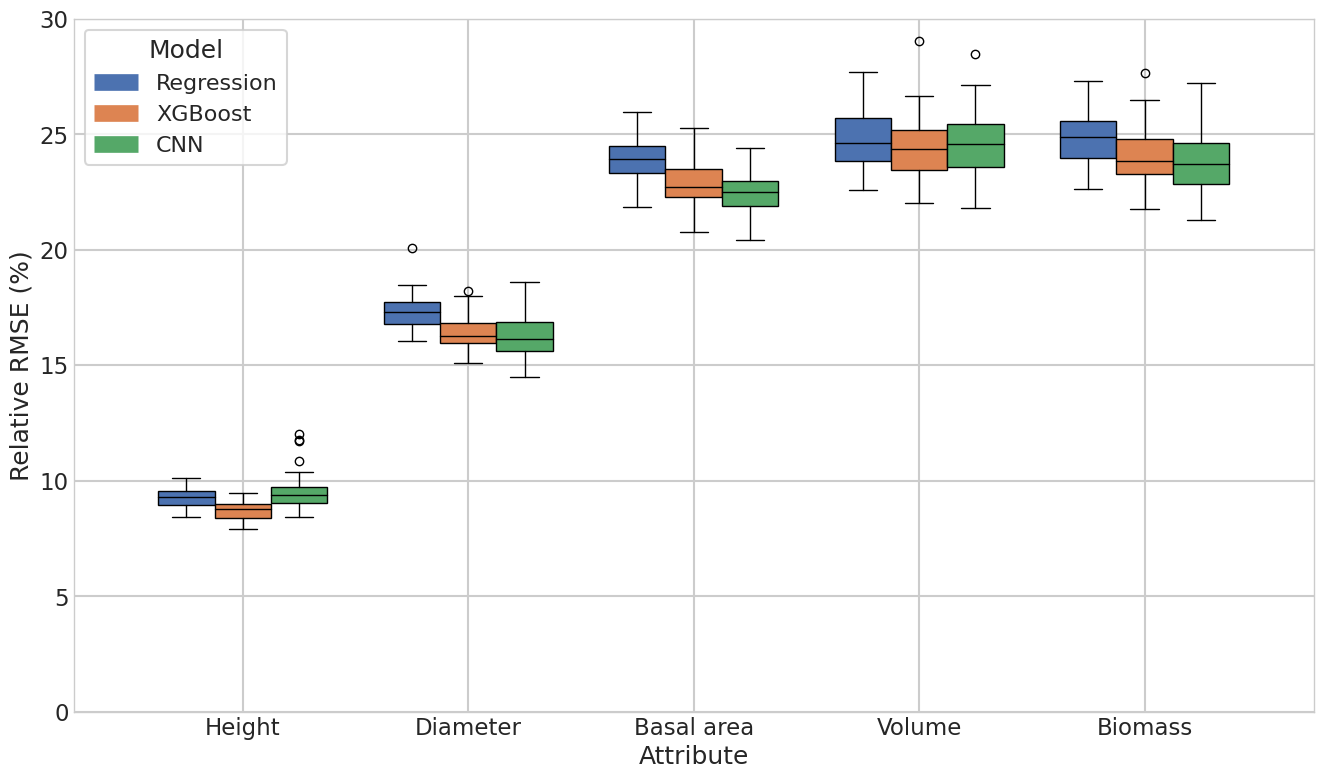

In [10]:
# Example data: Replace these with your actual percentage values

labels = ['Height', 'Diameter', 'Basal area', 'Volume', 'Biomass']
regression_data = [
    percentage_rmse_regression_0, percentage_rmse_regression_1, 
    percentage_rmse_regression_2, percentage_rmse_regression_3, 
    percentage_rmse_regression_4
]  # List of lists
xgboost_data = [
    percentage_rmse_xgboost_0, percentage_rmse_xgboost_1, 
    percentage_rmse_xgboost_2, percentage_rmse_xgboost_3, 
    percentage_rmse_xgboost_4
]  # List of lists
cnn_data = [
    percentage_rmse_cnn_0, percentage_rmse_cnn_1, 
    percentage_rmse_cnn_2, percentage_rmse_cnn_3, 
    percentage_rmse_cnn_4
]  # List of lists

# Combine the data for easier plotting
data = [regression_data, xgboost_data, cnn_data]
colors = sns.color_palette("deep", n_colors=3)
# Create positions for boxplots
x_positions = np.arange(len(labels))  # Positions for each metric
width = 0.25  # Width of each group of boxplots

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16, 9))

# Plot boxplots for each method
for i, method_data in enumerate(data):
    positions = x_positions + i * width
    

    plt.boxplot(
        method_data, positions=positions, widths=width, patch_artist=True,
        boxprops=dict(facecolor=colors[i], alpha=1),
        medianprops={'color': 'black', 'linewidth': 1}
    )

# Customize the plot
plt.xticks(x_positions + width, labels)  # Center the ticks between groups
plt.xlabel('Attribute')
plt.ylabel('Relative RMSE (%)')
plt.legend(['Regression', 'XGBoost', 'CNN'], title='Model', loc='upper left')

# Define Seaborn colors
colors = sns.color_palette("deep", n_colors=3)
regression_color = colors[0]  # First color
xgboost_color = colors[1]     # Second color
cnn_color = colors[2] 
legend_elements = [
    plt.Line2D([0], [0], color=regression_color, lw = 12,  solid_capstyle='butt', label='Regression', alpha = 1),
    plt.Line2D([0], [0], color=xgboost_color, lw = 12, solid_capstyle='butt', label='XGBoost', alpha = 1),
    plt.Line2D([0], [0], color=cnn_color, lw = 12,  solid_capstyle='butt', label='CNN', alpha = 1)
]

# Add explanation using plt.legend
plt.legend(handles=legend_elements, loc='upper left', fontsize=16, frameon=True, title = 'Model')
plt.ylim([0, 30])
plt.tick_params(axis='x', which='both', left=False, labelleft=False) 

# Show the plot
plt.savefig('initial_results_boxplot.png', bbox_inches = 'tight', pad_inches = 0.1, dpi = 300)
plt.show()

In [161]:
#perform some statistical tests
#height

regression_0 = extract_elements(df, 'regression', 0, 0)
xgboost_0 = extract_elements(df, 'xgboost', 0, 0)
cnn_0 = extract_elements(df, 'cnn', 0, 0)
from scipy import stats
a = stats.ttest_rel(regression_0, xgboost_0, alternative = 'greater')
print(a)

a = stats.ttest_rel(xgboost_0, cnn_0, alternative = 'greater')
print(a)

TtestResult(statistic=40.284418711138294, pvalue=2.3047855817197897e-111, df=249)
TtestResult(statistic=-18.67314540610794, pvalue=1.0, df=249)


In [162]:
#perform some statistical tests
#height

regression_0 = extract_elements(df, 'regression', 0, 0)
xgboost_0 = extract_elements(df, 'xgboost', 0, 0)
cnn_0 = extract_elements(df, 'cnn', 0, 0)
from scipy import stats
a = stats.wilcoxon(regression_0, xgboost_0, alternative = 'greater')
print(a)

a = stats.wilcoxon(xgboost_0, cnn_0, alternative = 'greater')
print(a)

WilcoxonResult(statistic=31368.0, pvalue=5.033974980225638e-43)
WilcoxonResult(statistic=35.0, pvalue=1.0)


In [163]:
#perform some statistical tests
#diameter

regression_0 = extract_elements(df, 'regression', 1, 0)
xgboost_0 = extract_elements(df, 'xgboost', 1, 0)
cnn_0 = extract_elements(df, 'cnn', 1, 0)
from scipy import stats
a = stats.ttest_rel(regression_0, xgboost_0, alternative = 'greater')
print(a)

a = stats.ttest_rel(xgboost_0, cnn_0, alternative = 'greater')
print(a)

TtestResult(statistic=29.52246300393535, pvalue=1.3422482374632427e-83, df=249)
TtestResult(statistic=5.8380596270029645, pvalue=8.19952507934813e-09, df=249)


In [164]:
#perform some statistical tests
#diameter

regression_0 = extract_elements(df, 'regression', 1, 0)
xgboost_0 = extract_elements(df, 'xgboost', 1, 0)
cnn_0 = extract_elements(df, 'cnn', 1, 0)
from scipy import stats
a = stats.wilcoxon(regression_0, xgboost_0, alternative = 'greater')
print(a)

a = stats.wilcoxon(xgboost_0, cnn_0, alternative = 'greater')
print(a)

WilcoxonResult(statistic=31254.0, pvalue=1.9749535301942997e-42)
WilcoxonResult(statistic=24454.0, pvalue=9.325603106786907e-15)


In [165]:
#perform some statistical tests
#basal area

regression_0 = extract_elements(df, 'regression', 2, 0)
xgboost_0 = extract_elements(df, 'xgboost', 2, 0)
cnn_0 = extract_elements(df, 'cnn', 2, 0)
from scipy import stats
a = stats.ttest_rel(regression_0, xgboost_0, alternative = 'greater')
print(a)

a = stats.ttest_rel(xgboost_0, cnn_0, alternative = 'greater')
print(a)

TtestResult(statistic=34.54525318496599, pvalue=2.9158642992097376e-97, df=249)
TtestResult(statistic=14.245858660756301, pvalue=2.2021903414746603e-34, df=249)


In [166]:
#perform some statistical tests
#basal area

regression_0 = extract_elements(df, 'regression', 2, 0)
xgboost_0 = extract_elements(df, 'xgboost', 2, 0)
cnn_0 = extract_elements(df, 'cnn', 2, 0)
from scipy import stats
a = stats.wilcoxon(regression_0, xgboost_0, alternative = 'greater')
print(a)

a = stats.wilcoxon(xgboost_0, cnn_0, alternative = 'greater')
print(a)

WilcoxonResult(statistic=31373.0, pvalue=4.739972604820754e-43)
WilcoxonResult(statistic=27912.0, pvalue=6.247452857050836e-27)


In [167]:
#perform some statistical tests
#volume

regression_0 = extract_elements(df, 'regression', 3, 0)
xgboost_0 = extract_elements(df, 'xgboost', 3, 0)
cnn_0 = extract_elements(df, 'cnn', 3, 0)
from scipy import stats
a = stats.ttest_rel(regression_0, xgboost_0, alternative = 'greater')
print(a)

a = stats.ttest_rel(xgboost_0, cnn_0, alternative = 'greater')
print(a)

TtestResult(statistic=11.926814065706841, pvalue=1.532862854568439e-26, df=249)
TtestResult(statistic=-0.893892534091245, pvalue=0.8138787192553936, df=249)


In [168]:
#perform some statistical tests
#volume

regression_0 = extract_elements(df, 'regression', 3, 0)
xgboost_0 = extract_elements(df, 'xgboost', 3, 0)
cnn_0 = extract_elements(df, 'cnn', 3, 0)
from scipy import stats
a = stats.wilcoxon(regression_0, xgboost_0, alternative = 'greater')
print(a)

a = stats.wilcoxon(xgboost_0, cnn_0, alternative = 'greater')
print(a)

WilcoxonResult(statistic=27213.0, pvalue=3.739902288796493e-24)
WilcoxonResult(statistic=15404.0, pvalue=0.5978182675688167)


In [169]:
#perform some statistical tests
#biomass

regression_0 = extract_elements(df, 'regression', 4, 0)
xgboost_0 = extract_elements(df, 'xgboost', 4, 0)
cnn_0 = extract_elements(df, 'cnn', 4, 0)
from scipy import stats
a = stats.ttest_rel(regression_0, xgboost_0, alternative = 'greater')
print(a)

a = stats.ttest_rel(xgboost_0, cnn_0, alternative = 'greater')
print(a)

TtestResult(statistic=20.007409610229406, pvalue=4.830563663366356e-54, df=249)
TtestResult(statistic=9.033803281918923, pvalue=2.360892189318613e-17, df=249)


In [170]:
#perform some statistical tests
#biomass

regression_0 = extract_elements(df, 'regression', 4, 0)
xgboost_0 = extract_elements(df, 'xgboost', 4, 0)
cnn_0 = extract_elements(df, 'cnn', 4, 0)
from scipy import stats
a = stats.wilcoxon(regression_0, xgboost_0, alternative = 'greater')
print(a)

a = stats.wilcoxon(xgboost_0, cnn_0, alternative = 'greater')
print(a)

WilcoxonResult(statistic=30426.0, pvalue=3.0109210468713316e-38)
WilcoxonResult(statistic=25250.0, pvalue=3.2690310271776036e-17)
